In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-15 19:11:19--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  6.91MB/s    in 5.0s    

2021-10-15 19:11:25 (6.91 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.08, random_state=42) # 0.1 x 0.8 = 0.08

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((3300, 1001), (897, 1001), (288, 1001))

Let's KFold over different values of `C`:

In [ ]:
from sklearn import svm

C_values = [2**i for i in range(8)]
print(C_values)
accuracies_val = []
accuracies_train = []

for k in ['linear', 'rbf', 'poly', 'sigmoid']:  
  print(f'Training SVM with C={c}')
  clf = svm.SVC(C = 128, kernel = k)
  clf.fit(X_train, Y_train)
  accuracies_val.append(clf.score(X_val, Y_val))
print(accuracies_val)

[1, 2, 4, 8, 16, 32, 64, 128]
Training SVM with C=128
Training SVM with C=128
Training SVM with C=128
Training SVM with C=128
[0.7395833333333334, 0.7638888888888888, 0.6597222222222222, 0.16666666666666666]


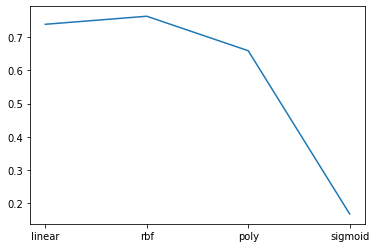

In [ ]:
plt.plot(['linear', 'rbf', 'poly', 'sigmoid'], accuracies_val)

In [ ]:
accuracies_val, accuracies_train

([0.7638888888888888], [1.0])

In [ ]:
C_values[np.argmax(accuracies_val)]

128

In [ ]:
clf = svm.SVC(C = 128, decision_function_shape ="ovr")
clf.fit(np.concatenate((X_train, X_val)), np.concatenate((Y_train, Y_val)))
clf.score(X_test, Y_test)

0.745819397993311

In [ ]:
clf = svm.SVC(C = 128, decision_function_shape ="ovo")
clf.fit(np.concatenate((X_train, X_val)), np.concatenate((Y_train, Y_val)))
clf.score(X_test, Y_test)

0.745819397993311

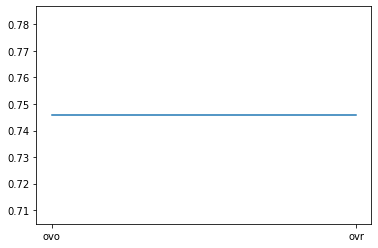

In [ ]:
plt.plot(["ovo", "ovr"], [0.745819397993311, 0.745819397993311])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {''kernel': }
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)

In [ ]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [50, 100, 150],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Do the same with different kernel values, and different decision functions: